<a href="https://colab.research.google.com/github/Amrit5988/Amrit5988/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=60d8f2648d0586b4272975a75756aca83520c67955f56b2c4b3ffeba585407f6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Define the uiverse of discourse for each variable
temprature = ctrl.Antecedent(np.arange(0, 101, 1), 'temprature')
humidity= ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

In [ ]:
#define membership function for temprature
temprature['low'] = fuzz.trapmf(temprature.universe, [0, 0, 20, 40])
temprature['medium'] = fuzz.trimf(temprature.universe, [20, 50, 80])
temprature['high'] = fuzz.trapmf(temprature.universe, [60, 80, 100, 100])

In [ ]:
#define membership function for humidity
humidity['low'] = fuzz.trapmf(humidity.universe, [0, 0, 30, 40])
humidity['high'] = fuzz.trapmf(humidity.universe, [40, 70, 100, 100])

In [ ]:
#define memebership function for fan speed
fan_speed['low'] = fuzz.trapmf(fan_speed.universe, [0, 0, 20, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [20, 50, 80])
fan_speed['high'] = fuzz.trapmf(fan_speed.universe, [60, 80, 100, 100])

In [ ]:
#define fuzzy rule
rule1 = ctrl.Rule(temprature['low'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temprature['medium'] & humidity['low'], fan_speed['medium'])
rule3 = ctrl.Rule(temprature['high'] & humidity['high'], fan_speed['high'])

In [ ]:
#create a control system and simulation
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_sim = ctrl.ControlSystemSimulation(fan_speed_ctrl)

In [ ]:
#example input
fan_speed_sim.input['temprature'] = 75
fan_speed_sim.input['humidity'] = 85

In [ ]:
#calculate output
fan_speed_sim.compute()

In [ ]:
#print the result
print(fan_speed_sim.output['fan_speed'])

83.46153846153847


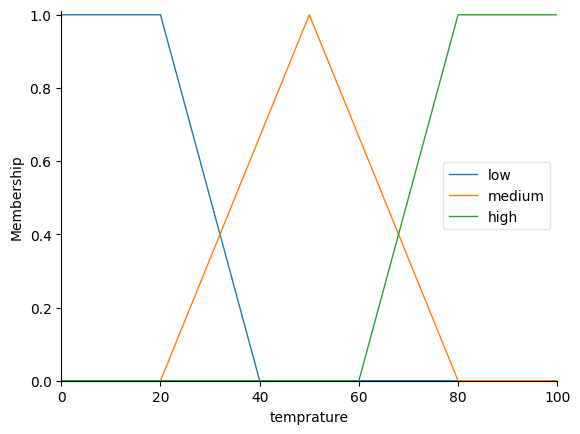

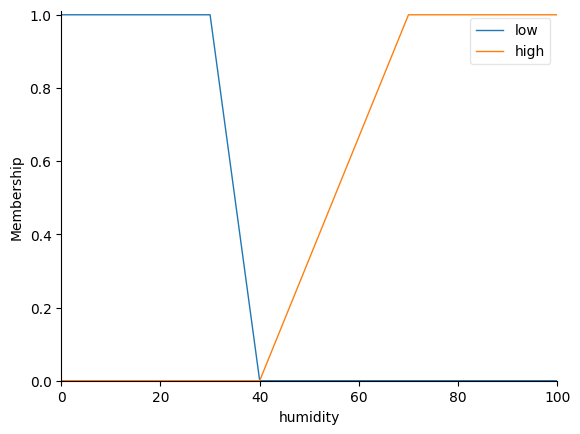

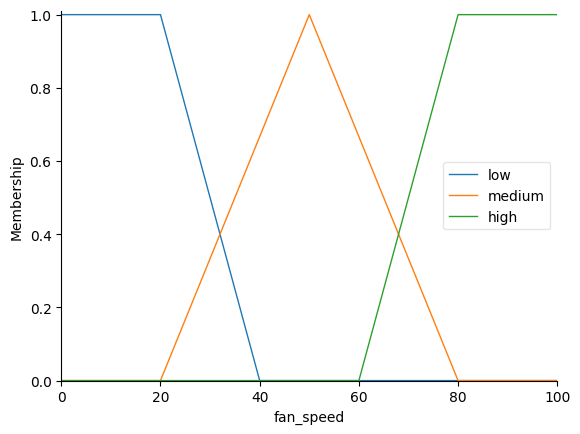

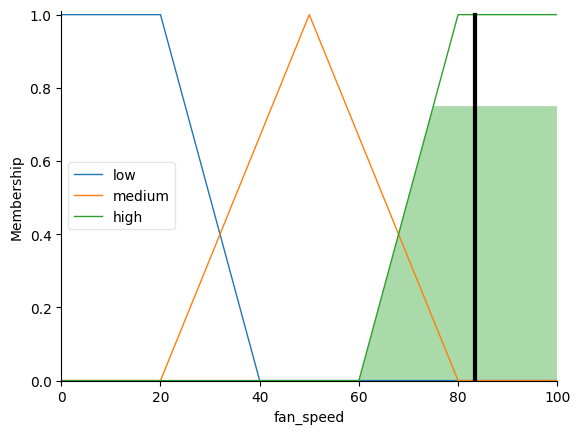

In [ ]:
#visualize the membership function and output
temprature.view()
humidity.view()
fan_speed.view()
fan_speed.view(sim=fan_speed_sim)